<a href="https://colab.research.google.com/github/the-faisalahmed/Optimization/blob/main/Skyscrapers_(Towers).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Skyscrapers

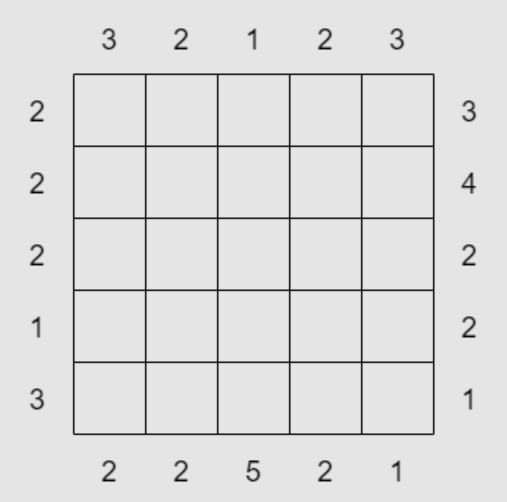

[Link](https://www.interactive.onlinemathlearning.com/fun_towers.phphttps://www.interactive.onlinemathlearning.com/fun_towers.php) to the original puzzle (use seed number $0$ to view the same skyscraper board).

Skyscrapers is a logic puzzle game that involves placing buildings of different heights in a grid. The objective is to fill in the grid with buildings so that every possible height appears exactly once in each row and column (like in Sudoku), creating a cityscape where the number of visible skyscrapers from a given direction matches the clue provided.

In [1]:
!pip install ortools
from ortools.sat.python import cp_model

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.3/309.3 kB 5.6 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
  Attempting uninstall: absl-py
    Found existing installation: absl-py 1.4.0
    Uninstalling absl-py-1.4.0:
      Successfully uninstalled absl-py-1.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires protobuf<5,>=3.20, but you have protobuf 5.27.2 which is incompatible.
google-ai-generativelanguage 0.6.4 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.19.5, but you have protobu

In [46]:
import math

# Creates the model and set solver
model = cp_model.CpModel()
solver = cp_model.CpSolver()

n = 5

# Input parameters
param_rows_right = {0: 2, 1: 2, 2: 2, 3: 1, 4: 3}
param_rows_left  = {0: 3, 1: 4, 2: 2, 3: 2, 4: 1}
param_col_down   = {0: 3, 1: 2, 2: 1, 3: 2, 4: 3}
param_col_up     = {0: 2, 1: 2, 2: 5, 3: 2, 4: 1}

# Board variables
x = {(i,j):model.NewIntVar(1, n, f"x_{i}_{j}") for i in range(n) for j in range(n)}
# Row variables
row_frwd = {(i,j):model.NewBoolVar(f"row_frwd_{i}_{j}") for i in range(n) for j in range(math.comb(5,2))}
row_bckd = {(i,j):model.NewBoolVar(f"row_bckd_{i}_{j}") for i in range(n) for j in range(math.comb(5,2))}
# Col variables
col_down = {(i,j):model.NewBoolVar(f"col_down_{i}_{j}") for i in range(n) for j in range(math.comb(5,2))}
col_up = {(i,j):model.NewBoolVar(f"col_up_{i}_{j}") for i in range(n) for j in range(math.comb(5,2))}
# Row boolean variables
y = {(i,j):model.NewBoolVar(f"y_{i}_{j}") for i in range(n) for j in range(n-1)}
y_bckd = {(i,j):model.NewBoolVar(f"y_bckd_{i}_{j}") for i in range(n) for j in range(n-1)}
# Col boolean variables
z = {(i,j):model.NewBoolVar(f"z_{i}_{j}") for i in range(n) for j in range(n-1)}
z_up = {(i,j):model.NewBoolVar(f"z_up_{i}_{j}") for i in range(n) for j in range(n-1)}

# Each row and col must contain numbers 1-5
for i in range(n):
  model.AddAllDifferent([x[i,j] for j in range(n)])
  model.AddAllDifferent([x[j,i] for j in range(n)])

for i in range(n):
  count = 0

  temp_row_frwd = []
  temp_row_bckd = []
  temp_col_down = []
  temp_col_up = []

  for j in range(n-1):
    for k in range(j+1):

      # Rows forward
      model.Add(x[i,j+1] > x[i,k]).OnlyEnforceIf(row_frwd[i,count])
      model.Add(x[i,j+1] < x[i,k]).OnlyEnforceIf(~row_frwd[i,count])
      # Rows backward
      model.Add(x[i,n-j-2] > x[i,n-j+k-1]).OnlyEnforceIf(row_bckd[i,count])
      model.Add(x[i,n-j-2] < x[i,n-j+k-1]).OnlyEnforceIf(~row_bckd[i,count])

      # Cols down
      model.Add(x[j+1,i] > x[k,i]).OnlyEnforceIf(col_down[i,count])
      model.Add(x[j+1,i] < x[k,i]).OnlyEnforceIf(~col_down[i,count])
      # Cols up
      model.Add(x[n-j-2,i] > x[n-j+k-1,i]).OnlyEnforceIf(col_up[i,count])
      model.Add(x[n-j-2,i] < x[n-j+k-1,i]).OnlyEnforceIf(~col_up[i,count])

      count+=1

    # Row forward
    expr_row_frwd = [row_frwd[i,x] for x in range(j,count) if row_frwd[i,x] not in temp_row_frwd]
    model.AddBoolAnd(expr_row_frwd).OnlyEnforceIf(y[i,j])
    model.AddBoolOr([x.Not() for x in expr_row_frwd]).OnlyEnforceIf(y[i,j].Not())
    # Row backward
    expr_row_bckd = [row_bckd[i,x] for x in range(j,count) if row_bckd[i,x] not in temp_row_bckd]
    model.AddBoolAnd(expr_row_bckd).OnlyEnforceIf(y_bckd[i,j])
    model.AddBoolOr([x.Not() for x in expr_row_bckd]).OnlyEnforceIf(y_bckd[i,j].Not())

    # Col down
    expr_col_down = [col_down[i,x] for x in range(j,count) if col_down[i,x] not in temp_col_down]
    model.AddBoolAnd(expr_col_down).OnlyEnforceIf(z[i,j])
    model.AddBoolOr([x.Not() for x in expr_col_down]).OnlyEnforceIf(z[i,j].Not())
    # Col up
    expr_col_up = [col_up[i,x] for x in range(j,count) if col_up[i,x] not in temp_col_up]
    model.AddBoolAnd(expr_col_up).OnlyEnforceIf(z_up[i,j])
    model.AddBoolOr([x.Not() for x in expr_col_up]).OnlyEnforceIf(z_up[i,j].Not())

    # Storing temporary combinations for each row, col, direction combination
    temp_row_frwd = expr_row_frwd
    temp_row_bckd = expr_row_bckd
    temp_col_down = expr_col_down
    temp_col_up = expr_col_up

  # Equating each row, col, direction combination to the specified value
  model.Add(sum(y[i,x] for x in range(n-1)) + 1 == param_rows_right[i])
  model.Add(sum(z[i,x] for x in range(n-1)) + 1 == param_col_down[i])
  model.Add(sum(y_bckd[i,x] for x in range(n-1)) + 1 == param_rows_left[i])
  model.Add(sum(z_up[i,x] for x in range(n-1)) + 1 == param_col_up[i])

status = solver.Solve(model)

print(f"Status = {solver.StatusName(status)}")

Status = OPTIMAL


In [47]:
import numpy as np
import pandas as pd

# Solution
sol = [solver.value(x[i]) for i in x.keys()]
sol = np.reshape(sol,(n,n))
print('Solution \n')
print(sol)

Solution 

[[2 1 5 4 3]
 [1 5 4 3 2]
 [4 2 3 5 1]
 [5 3 2 1 4]
 [3 4 1 2 5]]


# Verification

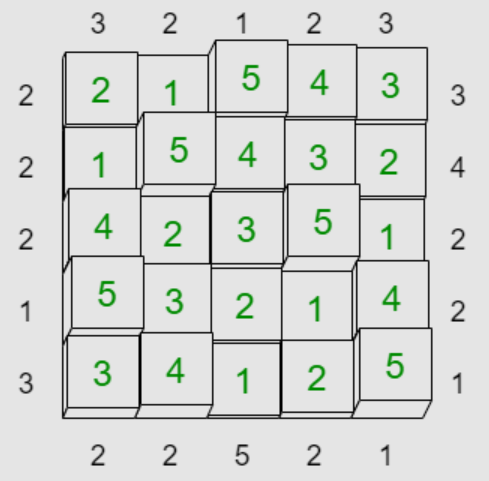